In [55]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
class Perceptron():
    # Construtor
    def __init__(self, learning_rate=0.01, n_iter=100):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.W = None
        self.b = None
    
    def fit(self, X, y):
        # inicializando pesos e vies
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        for i in range(self.n_iter):
            for j in range(X.shape[0]):
                predicted = self.predict(X[j])
                
                # atualizando valores de peso e vies
                self.weights += self.learning_rate * (y[i] - predicted) * X[i]
                self.bias += self.learning_rate * (y[i] - predicted)
    
    def predict(self, X):
        # Converta X e self.weights para float64
        X = X.astype(np.float64)
        self.weights = self.weights.astype(np.float64)
    
        # calculando a soma ponderada
        weighted_sum = np.dot(X, self.weights) + self.bias
        # funcao step
        if weighted_sum >= 0:
            return 1
        return 0

In [57]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["species"] = iris.target_names[iris.target]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
iris_df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

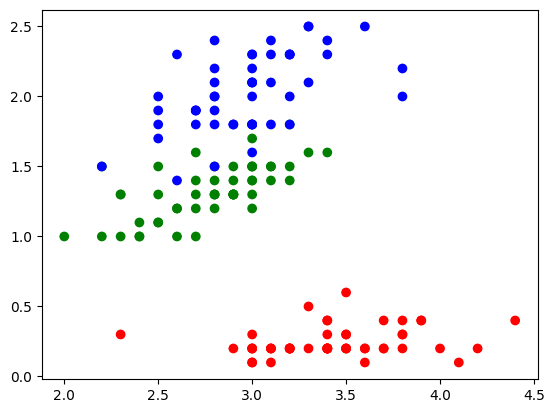

In [58]:
colors = iris_df["species"].replace(to_replace=['setosa', 'virginica', 'versicolor'], value=['red', 'blue', 'green'])
plt.scatter(iris_df['sepal width (cm)'], iris_df['petal width (cm)'], c = colors)

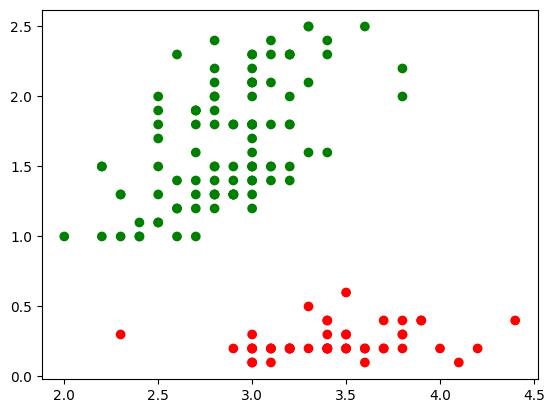

In [59]:
colors = iris_df["species"].replace(to_replace=['setosa', 'virginica', 'versicolor'], value=['red', 'green', 'green'])
plt.scatter(iris_df['sepal width (cm)'], iris_df['petal width (cm)'], c = colors)

In [60]:
df = iris_df.drop(['sepal length (cm)', 'petal length (cm)'], axis = 1)
df['species'].replace(to_replace=['setosa', 'virginica', 'versicolor'], value=[1.0, 0.0, 0.0], inplace=True)
df.head()

,sepal width (cm),petal width (cm),species
0,3.5,0.2,1.0
1,3.0,0.2,1.0
2,3.2,0.2,1.0
3,3.1,0.2,1.0
4,3.6,0.2,1.0


In [61]:
y = df[['species']]
y.head()

,species
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [62]:
X = df[['sepal width (cm)', 'petal width (cm)']]
X.head()

,sepal width (cm),petal width (cm)
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


In [63]:
X1 = X.values
y1 = y.values.flatten()
y1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [64]:
perceptron = Perceptron()
perceptron.fit(X1, y1)

predictions = [perceptron.predict(x) for x in X]

#predictions = []
#for x in X:
#    predict = perceptron.predict(x)
#    predictions.append(predict)

print(predictions)

AttributeError: 'str' object has no attribute 'astype'